[View in Colaboratory](https://colab.research.google.com/github/Masum06/gender_newspaper/blob/master/word2vec_similarity_statistics.ipynb)

**Description:**


*   Calculate similarity between 2 different Gensim word2vec model using numpy
*   Make statistical calculations with the models, such as Mean, Standar Deviation
*   Calculate number of words outside Standard Deviation
*   Print the words outside norm
*   Plot the histogram of words using Matplotlib




### Installation and Downloading model

In [1]:
!pip install lxml

    100% |████████████████████████████████| 5.9MB 4.0MB/s 


In [2]:
!pip install gensim

    100% |████████████████████████████████| 23.5MB 1.7MB/s 
    100% |████████████████████████████████| 1.4MB 14.6MB/s 
    100% |████████████████████████████████| 133kB 21.2MB/s 
    100% |████████████████████████████████| 61kB 22.2MB/s 
    100% |████████████████████████████████| 4.4MB 6.2MB/s 
    100% |████████████████████████████████| 552kB 21.9MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /content/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


### Download Trained Models

In [3]:
%%bash
git clone https://github.com/jeroenmeulenaar/python3-mega.git python3mega
cd python3mega
pip install -r requirements.txt

  Running setup.py bdist_wheel for URLObject: started
  Running setup.py bdist_wheel for URLObject: finished with status 'done'
  Stored in directory: /content/.cache/pip/wheels/fd/7e/18/ccb55ecc2834f945b769c1ff1df12ca5a14400ccfc58e3c515
  Running setup.py bdist_wheel for pycrypto: started
  Running setup.py bdist_wheel for pycrypto: finished with status 'done'
  Stored in directory: /content/.cache/pip/wheels/27/02/5e/77a69d0c16bb63c6ed32f5386f33a2809c94bd5414a2f6c196
Successfully built URLObject pycrypto


Cloning into 'python3mega'...


In [0]:
import os
os.chdir("python3mega")
from mega import Mega
m = Mega.from_ephemeral()
os.chdir("..")

In [0]:
m.download_from_url('https://mega.nz/#!1BJ1iYKZ!05H-DDnvzcfN4btuCF3ThExeG5T1xKvjzkOm2U6x5Uk')

In [0]:
m.download_from_url('https://mega.nz/#!MdYlBYRQ!qav9Yh_gjnhwiHonVYwfe_qq6rLZCglCbuA5AlFqX6U')

In [7]:
ls

datalab/  model_news_db_1  model_news_db_2  python3mega/


###Load 2 models

In [0]:
import gensim
model1 = gensim.models.Word2Vec.load('model_news_db_1')
model2 = gensim.models.Word2Vec.load('model_news_db_2')

### Similarity Matrix with numpy/Cupy

In [0]:
import numpy as np

In [10]:
mat1 = model1.wv.syn0/np.linalg.norm(model1.wv.syn0, axis=1).reshape(-1, 1) # NORMALIZE
mat2 = model2.wv.syn0/np.linalg.norm(model2.wv.syn0, axis=1).reshape(-1, 1) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [11]:
np.linalg.norm(mat1[59])

1.0

In [12]:
size = len(model1.wv.syn0)
print(size)

94734


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [13]:
mat1.shape

(94734, 100)

In [14]:
ones = np.ones((size, 1))
print(ones.shape)

(94734, 1)


In [0]:
import time

In [16]:
start_time = time.time()
similarity_mat1_multiplier = mat1.T @ ones
similarity_mat1 = mat1@similarity_mat1_multiplier
end_time = time.time()
print("%s seconds" % (end_time - start_time))
print(similarity_mat1.shape)

0.08306717872619629 seconds
(94734, 1)


In [17]:
start_time = time.time()
similarity_mat2_multiplier = mat2.T @ ones
similarity_mat2 = mat2 @ similarity_mat2_multiplier
end_time = time.time()
print("%s seconds" % (end_time - start_time))
print(similarity_mat2.shape)

0.06743669509887695 seconds
(94734, 1)


### Statistics

In [0]:
change_matrix = (similarity_mat1/similarity_mat2).reshape(-1)

In [19]:
print(change_matrix)

[1.01638709 0.93703821 1.00903267 ... 0.5375523  1.07114469 1.01028138]


In [0]:
k = 1
for i in change_matrix:
  print(i, end=", ")
  if k%7 == 0:
    print()
  k+=1

In [29]:
hist, _ = np.histogram(change_matrix, bins=20)
print(hist)

[    4     0     1     1     1     0     2    21 94545   145     6     1
     3     2     0     1     0     0     0     1]


In [0]:
change_matrix[change_matrix<-50]

array([-143.00914442, -398.99322584,  -95.38105705, -108.77047702,
       -742.13236814, -498.41039495, -112.88796326, -120.53128717,
        -79.09526515, -101.06832927, -136.77078869,  -84.17627431,
       -112.1062134 , -773.68652457,  -58.46775408,  -85.67409199,
        -71.0040236 ,  -62.24278807, -142.55329545, -741.71203935,
        -83.20477196,  -75.27196324, -204.92068242,  -82.5325554 ,
       -151.94548137, -213.88938069,  -84.31301918, -131.93146432,
        -54.76417333, -580.3248639 , -125.30828911,  -93.92861052,
       -126.7602052 ,  -95.39447695, -712.71967003])

In [0]:
std = change_matrix.std()

In [37]:
mean = change_matrix.mean()
print(mean)

1.0007349285804605


In [42]:
std_mul = 1
deviated_index = np.append(np.where( change_matrix > mean + std_mul*std ), np.where( change_matrix < mean - std_mul*std ) )
print(len(deviated_index))

367


In [66]:
std_mul = 1
deviated_index = np.append(np.where( change_matrix > 1.1 ), np.where( change_matrix < 0.9 ) )
print(len(deviated_index))

42923


In [0]:
model1.wv["the"]

In [0]:
model2.wv.syn0[model2.wv.vocab['girl'].index]

In [65]:
change_matrix[model2.wv.vocab['girl'].index]

0.9741434699634213

In [0]:
index2word = {}
for word in model2.wv.vocab:
  i = model2.wv.vocab[word].index
  index2word[i] = word

In [0]:
for i in deviated_index:
  print(i, index2word[i])

### Plotting

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

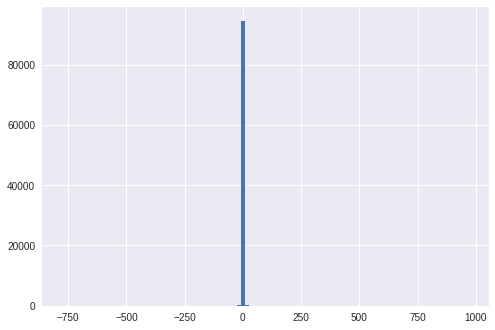

In [28]:
import matplotlib.pyplot as plt
#B = np.random.rand(1000)*100-50
_ = plt.hist(change_matrix, bins=100)
plt.show()

### Difference from "Woman" "Man"